### Ein randomisiertes fake Datenset erstellen

In [21]:
import numpy as np
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=10000, weights= (0.9,0.1))

In [22]:
x.shape

(10000, 20)

In [23]:
len(np.where(y == 0)[0])

8957

In [24]:
len(np.where(y == 1)[0])

1043

In [25]:
a,b = make_classification(n_samples = 10000, weights=(0.9,0.1))
idx = np.where(b == 0)[0]
# alle samples, die den wert 0 haben werden mit allen values (20) in x0 gespeichert
x0 = a[idx, :]
y0 = b[idx]
idx = np.where(b == 1)[0]
x1 = a[idx, :]
y1 = b[idx]

### Die Reihenfolge der Samples randomisieren (_die geschickte Variante_)
Wir können durch separieren von Label und Wert (x,y) sie nicht "in einem" sortieren.  
Also sortieren wir einen Vector von gleicher Form und nehmen die Indizes für die Label und Werte. 

In [26]:
idx = np.argsort(np.random.random(y0.shape))
y0 = y0[idx]
x0 = x0[idx]
idx = np.argsort(np.random.random(y1.shape))
y1 = y1[idx]
x1 = x1[idx]

90% der samples werden jetzt fürs Training extrahiert.  
AnzahlTraining ist dabei die Anzahl an samples in x0 und x1 die 90% ergeben sollen.

In [27]:
anzahlTraining0 = int(0.9*x0.shape[0])
anzahlTraining1 = int(0.9*x1.shape[0])
xTraining = np.zeros((int(anzahlTraining0 + anzahlTraining1), 20)) 
yTraining = np.zeros(int(anzahlTraining0 + anzahlTraining1))
xTraining[:anzahlTraining0] = x0[:anzahlTraining0]
xTraining[anzahlTraining0:] = x1[:anzahlTraining1]
yTraining[:anzahlTraining0] = y0[:anzahlTraining0]
yTraining[anzahlTraining0:] = y1[:anzahlTraining1]

In [28]:
restAnzahl0 = int(x0.shape[0]-anzahlTraining0)
restAnzahl1 = int(x1.shape[0]-anzahlTraining1)
anzahlValueFloored0 = restAnzahl0//2
anzahlValueFloored1 = restAnzahl1//2
anzahlValue0 = restAnzahl0//2
anzahlValue1 = restAnzahl1//2
xValue = np.zeros((int(anzahlValue0 + anzahlValue1), 20))
yValue = np.zeros((int(anzahlValue0 + anzahlValue1)))
xValue[:anzahlValueFloored0] = x0[anzahlTraining0:(anzahlTraining0 + anzahlValueFloored0)]
xValue[anzahlValueFloored0:] = x1[anzahlTraining1:(anzahlTraining1 + anzahlValueFloored1)]
yValue[:anzahlValueFloored0] = y0[anzahlTraining0:(anzahlTraining0 + anzahlValueFloored0)]
yValue[anzahlValueFloored0:] = y1[anzahlTraining1:(anzahlTraining1 + anzahlValueFloored1)]


In [29]:
xTest = np.concatenate((x0[(anzahlTraining0 + anzahlValueFloored0):],x1[(anzahlTraining1+anzahlValueFloored1):]))
yTest = np.concatenate((y0[(anzahlTraining0 + anzahlValueFloored0):],y1[(anzahlTraining1+anzahlValueFloored1):]))

### Die Reihenfolge der Samples randomisieren (_die einfache Variante_)
Wenn das Datenset groß genug ist, dann kann man es auch ohne vorsortieren partitionieren.  
10000 Samples sollten groß genug sein.  
Hier werden also 10000 Samples erstellt und dann mit dem Trick von oben sortiert.

In [30]:
x, y = make_classification(n_samples = 10000, weights = (0.9, 0.1))
idx = np.argsort(np.random.random(y.shape[0]))
x = x[idx]
y = y[idx]

In [31]:
anzahlTraining = int(0.9*y.shape[0])
anzahlValue = int(0.05*y.shape[0])

In [32]:
xTraining = x[:anzahlTraining]
yTraining = y[:anzahlTraining]
xValue = x[anzahlTraining: (anzahlTraining + anzahlValue)]
yValue = y[anzahlTraining: (anzahlTraining + anzahlValue)]
xTest = x[(anzahlTraining + anzahlValue)]


## Zahlen vs Visualisierung _eine vorab-Analyse der Daten_
### Die Daten in Zahlen
Der _mean_ oder auch Mittelwert, ist der Wert, der sich durch teilen der Summe der Elemente durch die Elemente ergibt.  
Std steht hier nicht für sexually transmitted diseases, sondern für die _Standard Deviation_ - die Standart Abweichung im Deutschen - , sie berechnet sich durch die durchschnittliche Differenz aus den Datenwerten und dem Mittelwert. Sie gibt die Stauchung der Glockenkurve an.  
Der _standard error_ oder Standart Fehler gibt den Unterschied zwischen unserem Mittelwert und dem Mittelwert der _Parent distribution_, also des Hauptdatensets.  
Der _Median_ ergibt sich, wenn man alle Elemente der Größe nach sortiert und den Wert in der Mitte auswählt.  
Die Extrema _Minimum und Maximum_ sind schlichtweg die größten und kleinsten Werte des Datensatzes.

In [33]:
import numpy as np

f = [0.3408,3.0150,4.3465,2.1271,2.7561,
    2.7887,4.8231,0.0705,3.9897,0.9804,
    2.3944,2.0085,1.7821,1.5362,2.3190]
f = np.array(f)
print("mean = %0.4f"  %f.mean())
print("std = %0.4f"  %f.std())
print("SE = %0.4f"  %(f.std() / np.sqrt(f.shape[0])))
print("median = %0.4f"  %(np.median(f)))
print("min = %0.4f"  %f.min())
print("max = %0.4f" %f.max())

mean = 2.3519
std = 1.3128
SE = 0.3390
median = 2.3190
min = 0.0705
max = 4.8231


### Die Daten in Graphen

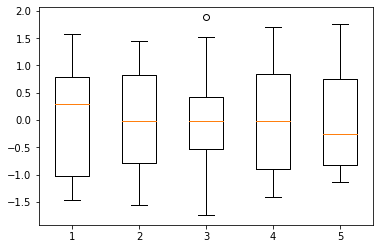

In [34]:
import matplotlib.pyplot as plt

d = [[ 0.6930, -1.1259, -1.5318,  0.9525,  1.1824],
    [ 0.5464, -0.0120,  0.5051, -0.0192, -0.1141],
    [ 0.8912,  1.3826,  1.5193, -1.1996, -1.1403],
    [ 1.1690,  0.4970, -0.1712, -0.5340,  0.3047],
    [-0.9221, -0.1071,  0.3079, -0.3885, -0.4753],
    [ 1.5699, -1.4767,  0.3327,  1.4714,  1.1807],
    [-0.3479,  0.4775,  1.8823, -1.4031, -0.7396],
    [ 0.0887, -0.4353, -1.7377, -1.2349,  1.7456],
    [ 1.0775,  0.9524,  1.2475,  0.7291, -1.1207],
    [-1.4657,  0.9250, -1.0446,  0.4262, -1.0279],
    [-1.3332,  1.4501,  0.0323,  1.1102, -0.8966],
    [ 0.3005, -1.4500, -0.2615,  1.7033, -0.2505],
    [-1.4377, -0.2472, -0.4340, -0.7032,  0.3362],
    [ 0.3016, -1.5527, -0.6213,  0.1780, -0.7517],
    [-1.1315,  0.7225, -0.0250, -1.0881,  1.7674]]

d = np.array(d)
plt.boxplot(d)
plt.show()

## Erklärung des Boxplots
![alt text](boxplot_explained.png "Das ist der mittlere")
Der Strich Q1 ist die obere Grenze des untersten Viertels. Also ist alles unterhalb von Q1 die niedrigsten 25%.  
Q2 ist der Median und beschreibt den Mittelpunkt der Daten.  
Q3 ist die obere Version von Q1. Oberhalb sind die höchsten 25% der Daten.  
Die abstrakten Striche ganz oben und unten sind die _whiskers_. Sie berechnen sich aus den Formeln Q1 - 1.5 * IQR und Q3 + 1.5 * IQR.  
Darüber und Drunter sind nurnoch die Außreißer (_outliers_) anzufinden.